# **Introduction**

Chúng ta đã xây dựng một loạt các mạng nơ-ron phức hợp từ đầu và tất cả chúng dường như đang học hỏi, tuy nhiên, vẫn còn rất nhiều chỗ để cải thiện.

Để cải thiện (các) mô hình của mình, chúng ta có thể dành một khoảng thời gian để thử các cấu hình khác nhau, thêm nhiều lớp hơn, thay đổi tốc độ học, điều chỉnh số lượng tế bào thần kinh trên mỗi lớp và hơn thế nữa

Tuy nhiên, việc làm này rất mất thời gian. Có một kỹ thuật mà chúng tôi có thể sử dụng để tiết kiệm thời gian. Nó được gọi là học chuyển giao(**transfer learning**), nói cách khác, lấy các mẫu (còn gọi là trọng số) một mô hình khác đã học được từ một bài toán khác và sử dụng chúng cho bài toán của chính chúng ta.

Có hai lợi ích chính khi sử dụng phương pháp học chuyển tiếp:
1. Có thể tận dụng một kiến ​​trúc mạng nơ-ron hiện có được chứng minh là hoạt động trên các vấn đề tương tự như của chúng ta.
2. Có thể tận dụng một kiến ​​trúc mạng nơ-ron đang hoạt động vốn đã học được các mẫu trên dữ liệu tương tự như của chúng ta. Điều này thường dẫn đến việc đạt được kết quả tuyệt vời với ít dữ liệu tùy chỉnh hơn

Điều này có nghĩa là, thay vì tạo thủ công các kiến ​​trúc mạng nơ-ron của riêng chúng ta hoặc xây dựng chúng từ đầu, chúng ta có thể sử dụng các mô hình đã hoạt động.

Và thay vì đào tạo các mô hình của chính chúng ta từ đầu trên các tập dữ liệu của riêng mình, chúng ta có thể lấy các mẫu mà một mô hình đã học được từ các tập dữ liệu như `ImageNet` (hàng triệu hình ảnh của các đối tượng khác nhau) và sử dụng chúng làm nền tảng của riêng mình. Điều này thường dẫn đến kết quả tuyệt vời với ít dữ liệu hơn.

Các loại Transfer Learning:
1. **Original (As is) transfer learning**: Lấy mô hình đã được đào tạo sẵn và áp dụng nó mà không có bất kỳ thay đổi nào
2. **Feature extraction transfer learning**: Lấy các trọng số của một mô hình đã được huấn luyện và điều chỉnh kết quả đầu ra của nó để phù hợp với vấn đề đang giải quyết.
3. **Fine-tuning transfer learning**: Lấy các trọng số của mô hình đã được huấn luyện và điều chỉnh chúng theo vấn đề cần giải quyết.

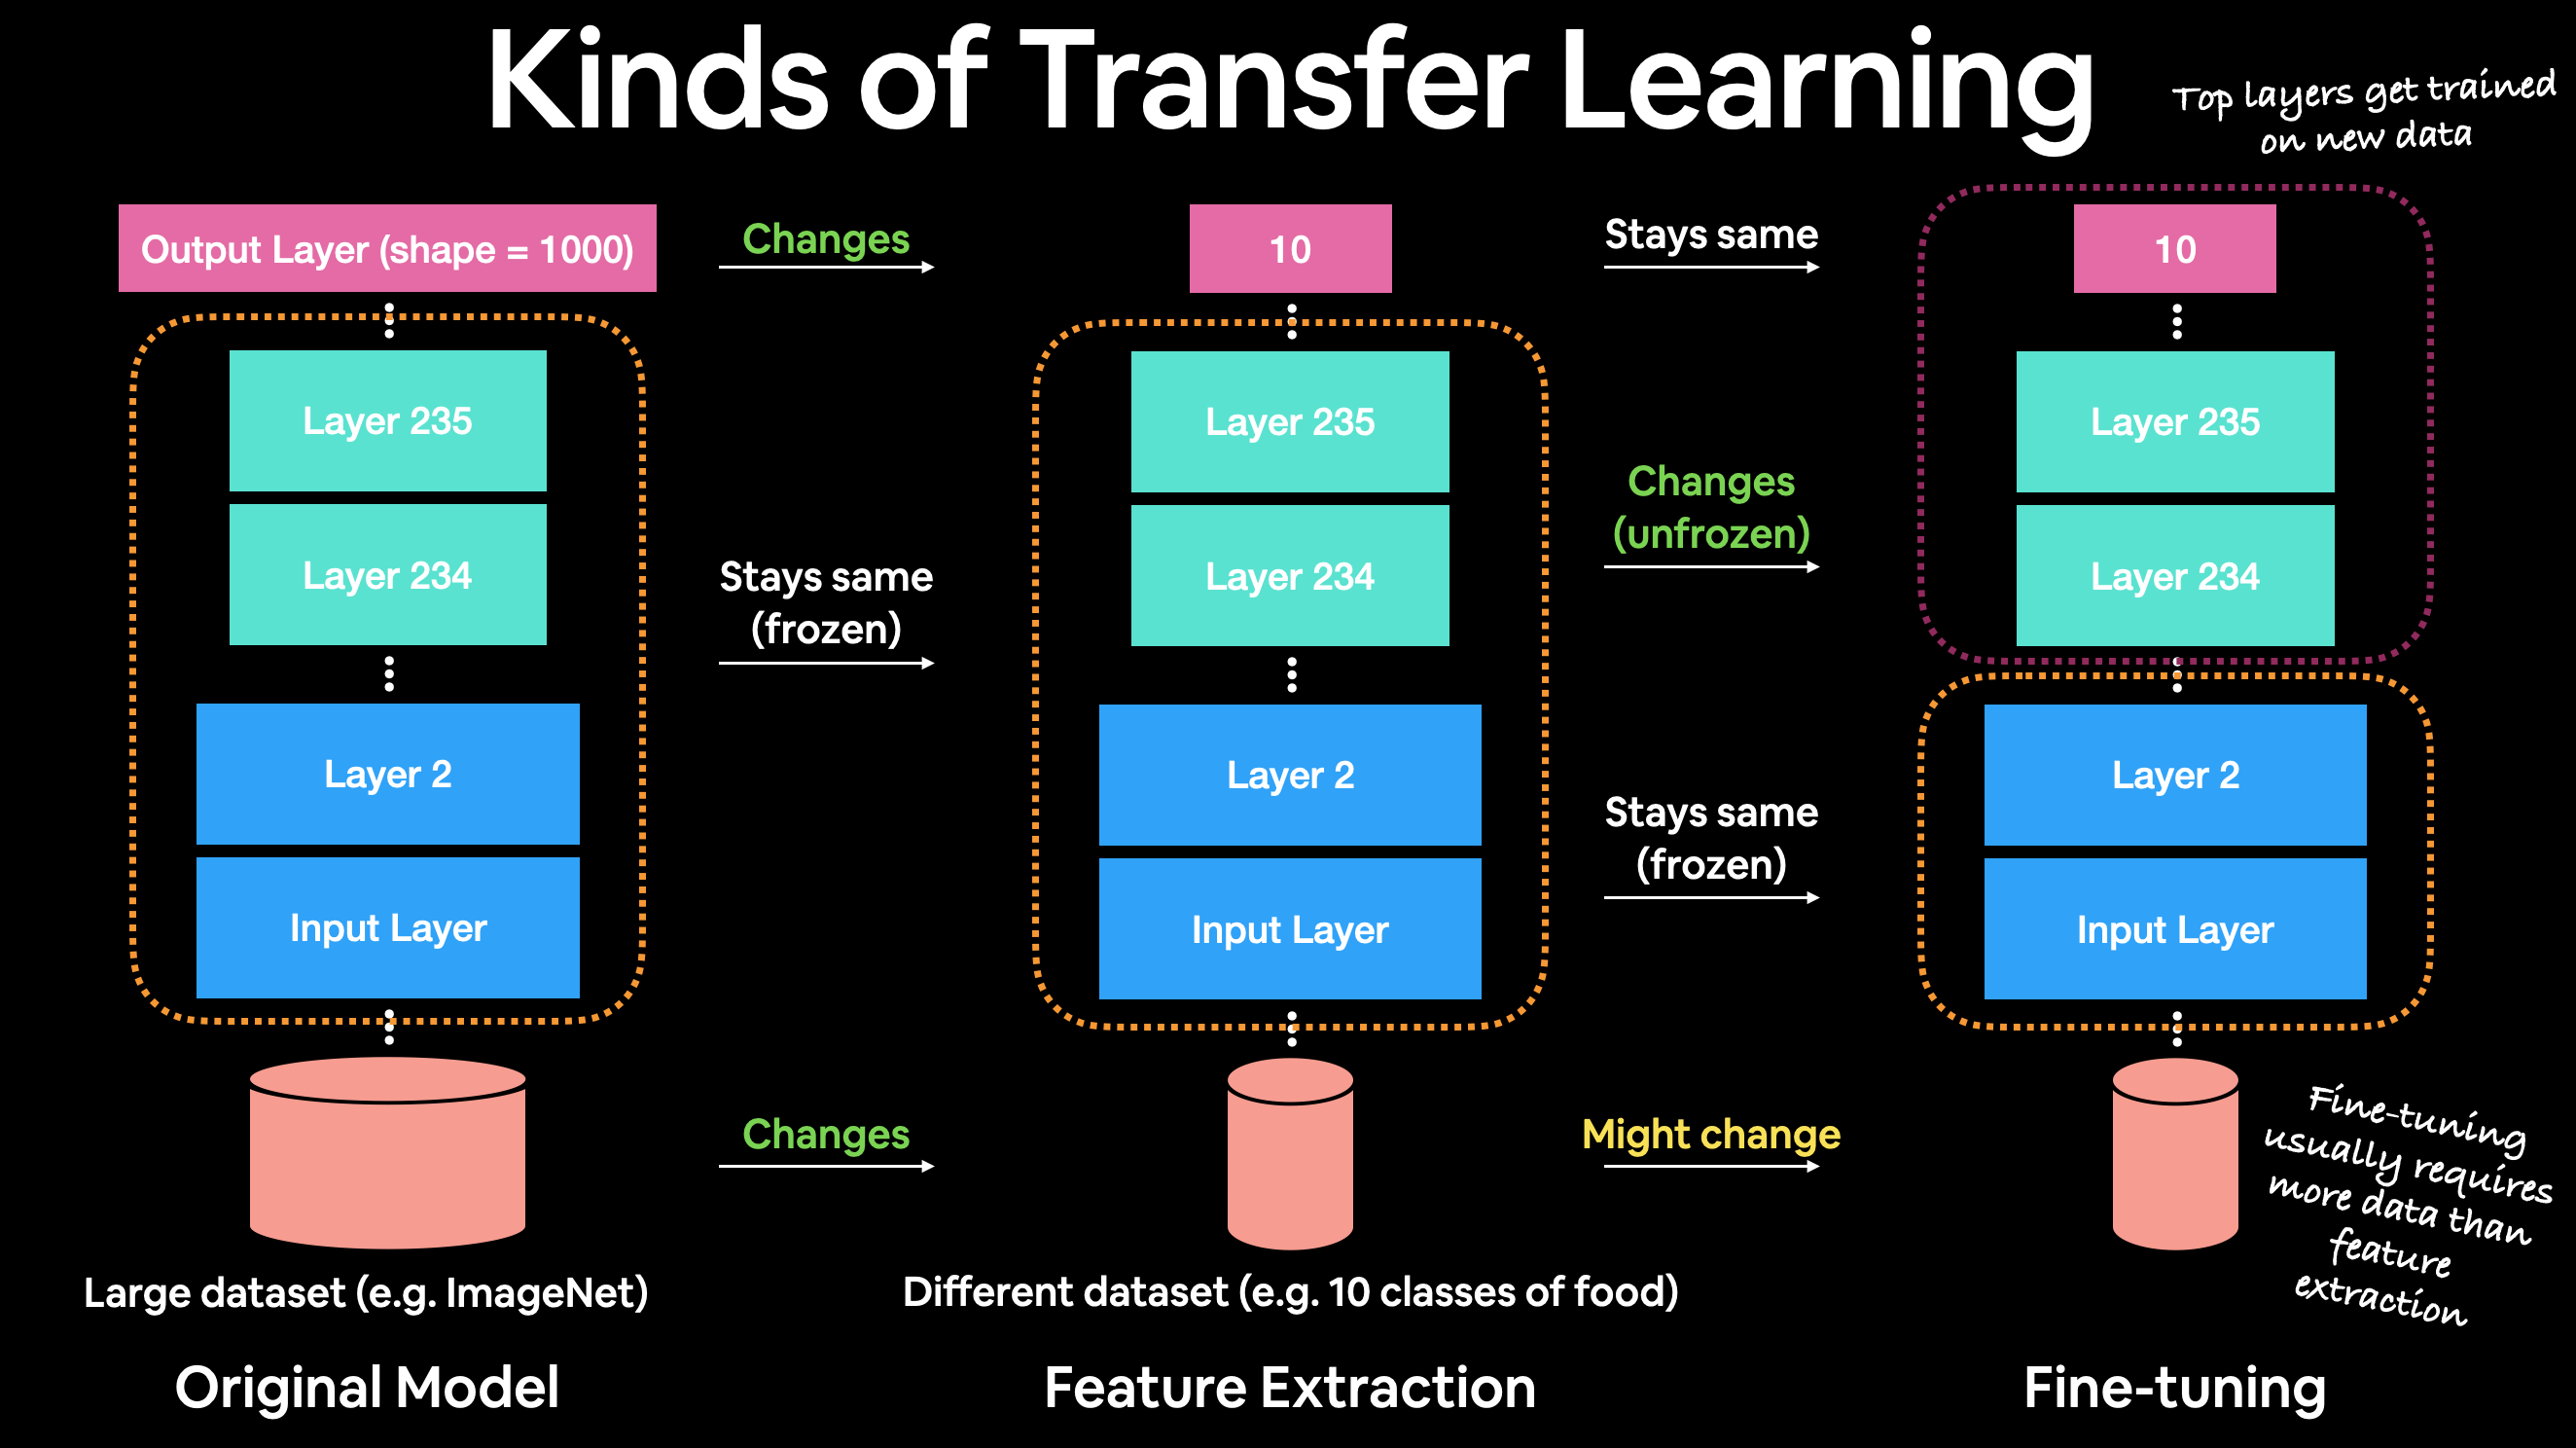

# **Transfer leanring with TensorFlow Hub: Getting great results with 10% of the data**

Đối với nhiều vấn đề sử dụng học sâu, rất có thể, một mô hình hoạt động đã tồn tại. Và tin tốt là chúng ta có thể truy cập nhiều trong số chúng trên TensorFlow Hub.

[TensorFlow Hub](https://tfhub.dev/) là một kho lưu trữ các thành phần mô hình hiện có. Nó làm cho nó để bạn có thể nhập và sử dụng một mô hình được đào tạo đầy đủ với ít nhất là một URL.

Để có thể xem được sức mạnh của transfer learning, Chúng ta sẽ đi xây dụng mô hình chỉ với 10% bộ dữ liệu của phần CNNs. Kết quả hi vọng có thể tương tự( hoặc tốt hơn) so với mô hình chúng ta đã xây dựng ở phần CNNs


# Downloading and becoming one with the data

In [ ]:
# Get data (10% of label)
import zipfile

# Download data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

# Unzip the download file
zip_ref = zipfile.ZipFile('10_food_classes_10_percent.zip', 'r')
zip_ref.extractall()
zip_ref.close ()

--2021-06-09 04:10:10--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.128, 142.250.141.128, 2607:f8b0:4023:c0b::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   134MB/s    in 1.2s    

2021-06-09 04:10:11 (134 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
# How many image in each folder?
import os

# Walk through 10 percent data directory and list number of file
for dirpath, dirnames, filenames, in os.walk('10_food_classes_10_percent'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.')

There are 2 directories and 0 images in 10_food_classes_10_percent.
There are 10 directories and 0 images in 10_food_classes_10_percent/train.
There are 0 directories and 75 images in 10_food_classes_10_percent/train/ice_cream.
There are 0 directories and 75 images in 10_food_classes_10_percent/train/hamburger.
There are 0 directories and 75 images in 10_food_classes_10_percent/train/fried_rice.
There are 0 directories and 75 images in 10_food_classes_10_percent/train/ramen.
There are 0 directories and 75 images in 10_food_classes_10_percent/train/sushi.
There are 0 directories and 75 images in 10_food_classes_10_percent/train/steak.
There are 0 directories and 75 images in 10_food_classes_10_percent/train/chicken_curry.
There are 0 directories and 75 images in 10_food_classes_10_percent/train/grilled_salmon.
There are 0 directories and 75 images in 10_food_classes_10_percent/train/pizza.
There are 0 directories and 75 images in 10_food_classes_10_percent/train/chicken_wings.
There are

Lưu ý rằng mỗi thư mục đào tạo hiện có 75 hình ảnh thay vì 750 hình ảnh. Đây là chìa khóa để chứng minh `transfer learning` có thể hoạt động tốt như thế nào với các hình ảnh ít được dán nhãn hơn.

Các thư mục thử nghiệm vẫn có cùng một lượng hình ảnh. Điều này có nghĩa là chúng tôi sẽ đào tạo về ít dữ liệu hơn nhưng đánh giá các mô hình của chúng tôi trên cùng một lượng dữ liệu thử nghiệm.

# Creating data loaders (preparing the data)

In [ ]:
# Setup data inputs
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

train_dir = '10_food_classes_10_percent/train'
test_dir = '10_food_classes_10_percent/test'

train_datagen = ImageDataGenerator( rescale = 1/255.)
test_datagen = ImageDataGenerator( rescale = 1/255.)

print('Training images:')
train_ds_10_percent = train_datagen.flow_from_directory(train_dir,
                                                        target_size = IMAGE_SHAPE,
                                                        batch_size = BATCH_SIZE,
                                                        class_mode = 'categorical')
print('Testing images:')
test_ds_10_percent = test_datagen.flow_from_directory(test_dir,
                                                        target_size = IMAGE_SHAPE,
                                                        batch_size = BATCH_SIZE,
                                                        class_mode = 'categorical')


Training images:
Found 750 images belonging to 10 classes.
Testing images:
Found 2500 images belonging to 10 classes.


Tải dữ liệu vào, chúng ta có thể thấy  có 750 hình ảnh trong tập dữ liệu đào tạo thuộc 10 lớp (75 cho mỗi lớp) và 2500 hình ảnh trong tập thử nghiệm thuộc 10 lớp (250 cho mỗi lớp).

# Setting up callbacks (things to run whilst our model trains)

 `Callbacks` là chức năng bổ sung mà chúng có thể thêm vào các mô hình của mình để thực hiện trong hoặc sau khi đào tạo. Một số cách `Callbacks` lại phổ biến nhất bao gồm:
 >- Experiment tracking with TensorBoard - ghi nhật ký hoạt động của nhiều mô hình, sau đó xem và so sánh các mô hình này một cách trực quan trên TensorBoard (một bảng điều khiển để kiểm tra các thông số mạng thần kinh). Hữu ích để so sánh kết quả của các mô hình khác nhau trên dữ liệu.
 >- Model checkpointing - lưu mô hình khi nó đào tạo để  có thể ngừng đào tạo nếu cần và quay lại để tiếp tục ở điểm dừng. Hữu ích nếu việc tập luyện mất nhiều thời gian và không thể thực hiện ngay trong một lần.
- Early stopping - để chương trình đào tạo mô hình trong một khoảng thời gian tùy ý và yêu cầu nó tự động ngừng đào tạo khi không còn cải tiến. Hữu ích khi có một tập dữ liệu lớn và không biết quá trình đào tạo sẽ mất bao lâu.




Trong sổ tay này chúng ta sẽ xem cách `TensorBoard Callbacks` có thể được sử dụng như thế nào.

Lệnh gọi lại `TensorBoard` có thể được truy cập bằng cách sử dụng `tf.keras.callbacks.TensorBoard()`.

Chức năng chính của nó là lưu các chỉ số hiệu suất đào tạo của một mô hình vào một `log_dir` được chỉ định.

Theo mặc định, nhật ký được ghi lại mỗi `epoch` bằng cách sử dụng tham số `update_freq = 'epoch'`. Đây là một mặc định tốt vì theo dõi hiệu suất mô hình quá thường xuyên có thể làm chậm quá trình đào tạo mô hình.



In [ ]:
# Create tensorboard callback (functioned b/c need to create a new one for each model)
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + '/' + experiment_name + '/' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir)
  print(f'Saving TensorBoard log file to: {log_dir}')
  return tensorboard_callback

Hàm của chúng ta lưu nhật ký hiệu suất của mô hình vào một thư mục có tên `[dir_name]/[experiment_name]/[current_timestamp]`, trong đó:
- `dir_name`: là thư mục nhật ký tổng thể
- `experiment_name` : là thí nghiệm cụ thể
- `current_timestamp`: là thời gian thử nghiệm bắt đầu dựa trên `datetime.datetime().now()` của Python

# Creating models using TensorFlow Hub

Trong quá khứ, chúng ta đã sử dụng TensorFlow để tạo các mô hình của riêng mình từng lớp từ đầu.

Bây giờ chúng ta sẽ thực hiện một quá trình tương tự, ngoại trừ phần lớn các lớp của mô hình của chúng ta sẽ đến từ TensorFlow Hub.

Chúng ta sẽ quan tâm đến hai mô hình trong sổ tay này:
1. ResNetV2 - một kiến ​​trúc mô hình thị giác máy tính hiện đại từ năm 2016.
2. EfficientNet - kiến trúc thị giác máy tính hiện đại từ năm 2019.

Cả hai mô hình này đã đạt được tỷ lệ lỗi thấp nhất trên ImageNet (ILSVRC-2012-CLS),

Các bước để tìm những mô hình này trên TensorFlow Hub:
1. truy cập https://www.tfhub.dev
2. Chọn lĩnh vực cần giải quyết(problem domain), ví dụ "Image"
3. Chọn phiên bản TF, Hiện tại thường là các bản 2.
4. Loại bỏ các problem domain ngoại trừ cái chúng ta cần
> chứ ý: "Image feature vector" có thể được sử dụng cùng với hầu hết mọi vấn đề.
5. Các mô hình được liệt kê là tất cả các mô hình có thể được sử dụng cho vấn đề đang cần giải quyết

Để chọn được các mô hình có hiệu quả tốt nhất thì chúng ta có thể xem danh sách các mô hình hiện đại trên https://www.paperswithcode.com/, một tài nguyên để thu thập các kết quả nghiên cứu sâu mới nhất về bài báo có triển khai mã cho những phát hiện mà họ báo cáo.





Trong phần này chúng ta sẽ sử dụng hai mô hình [efficientnet B7](https://tfhub.dev/tensorflow/efficientnet/b7/feature-vector/1)
và [Resnet v2 50](https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5) và so sánh chúng

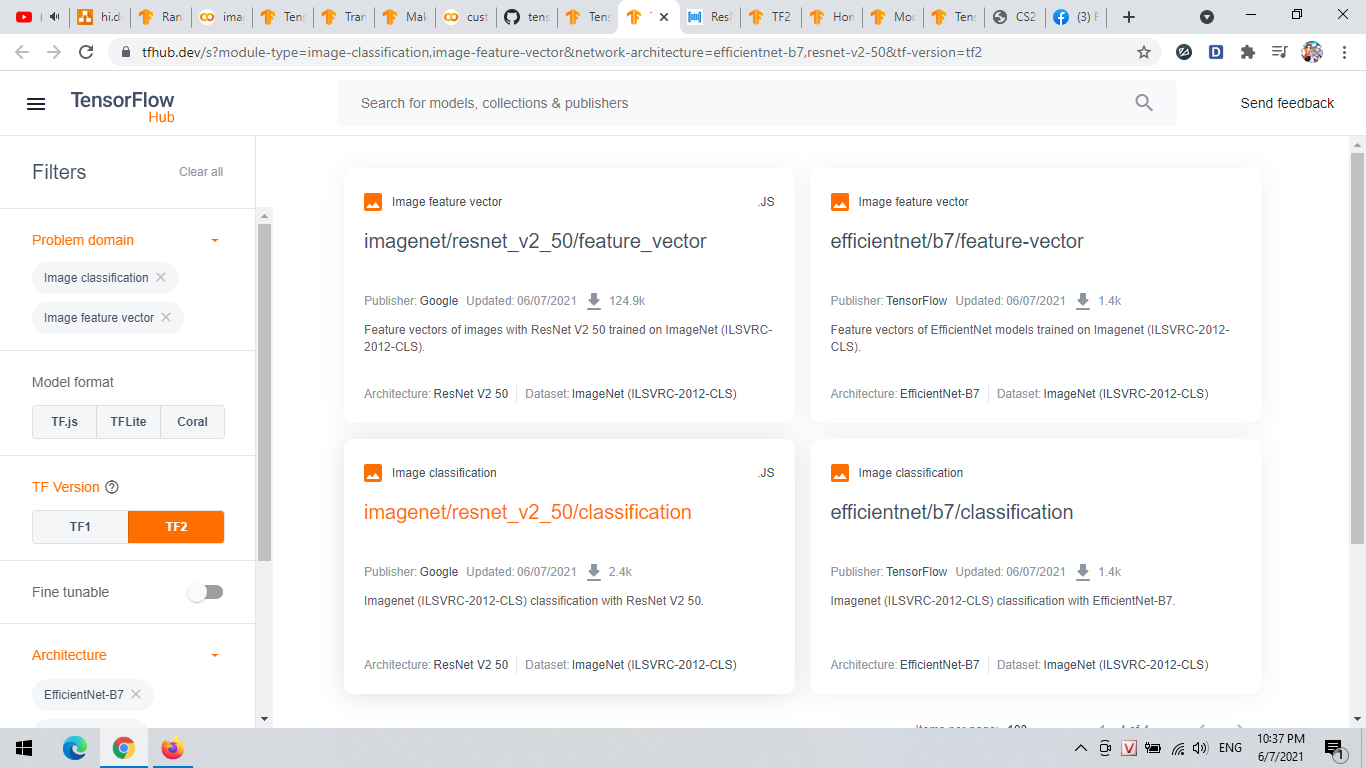

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [ ]:
# ResNet v2 50 feature vector
resNet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"

# Efficientnet B7 feature vector
efficientNet_url = "https://tfhub.dev/tensorflow/efficientnet/b7/feature-vector/1"

Vì chúng ta sẽ so sánh hai mô hình, để tự lưu mã, chúng ta sẽ tạo một hàm create_model (). Hàm này sẽ lấy URL từ TensorFlow Hub của mô hình, cài đặt mô hình  Keras Sequential với số lượng lớp đầu ra thích hợp và trả về mô hình.

In [ ]:
  def create_model(model_url, num_classes = 10):
    """Take a Tensorflow Hub URL and creates a Keras Sequential model with it

    Args:
      model_url (str): A TensorFlow Hub feature extraction URL 
      num_classes (int): Number of output neurons in output layer,
      should be equal to number of target classes, default 10.

    Return:
      An uncompiled Keras Sequential model with model_url as feature extractor
      layer and Dense output layer with num_classes outputs.
    """

    # Dowload the pretrained model and save it as a Keras layer
    feature_extractor_layer = hub.KerasLayer(model_url, trainable = False, # freeze the underlying patterns
                                            name = 'feature_extractor_layer',
                                            input_shape = IMAGE_SHAPE + (3,)) # define the input image shape
                                            
    # Create a model
    model = tf.keras.Sequential(
        [
        feature_extractor_layer,
        layers.Dense(num_classes, activation = 'softmax', name = 'output_layer')
        ]
    )

    return model

ResNET model

In [ ]:
# Create the model 
resNet_model = create_model(resNet_url, num_classes = train_ds_10_percent.num_classes)

# Compile the model
resNet_model.compile(loss = 'categorical_crossentropy',
                     optimizer = 'Adam',
                     metrics = ['accuracy'])

In [ ]:
# Fit the model 
resNet_history = resNet_model.fit(train_ds_10_percent, epochs = 5,
                                  steps_per_epoch = len(train_ds_10_percent),
                                  validation_data = test_ds_10_percent,
                                  validation_steps = len(test_ds_10_percent),
                                  # Add TensorBoard callback to model
                                  callbacks = [create_tensorboard_callback(dir_name = "tensorflow_hub",
                                                                          experiment_name = 'resnet50v2')])

Saving TensorBoard log file to: tensorflow_hub/resnet50v2/20210609-041024
Epoch 1/5
24/24 [==============================] - 51s 769ms/step - loss: 1.8241 - accuracy: 0.3827 - val_loss: 1.1326 - val_accuracy: 0.6372
Epoch 2/5
24/24 [==============================] - 15s 659ms/step - loss: 0.8754 - accuracy: 0.7373 - val_loss: 0.8422 - val_accuracy: 0.7284
Epoch 3/5
24/24 [==============================] - 15s 655ms/step - loss: 0.6114 - accuracy: 0.8240 - val_loss: 0.7539 - val_accuracy: 0.7480
Epoch 4/5
24/24 [==============================] - 15s 655ms/step - loss: 0.4714 - accuracy: 0.8747 - val_loss: 0.6942 - val_accuracy: 0.7792
Epoch 5/5
24/24 [==============================] - 15s 661ms/step - loss: 0.3787 - accuracy: 0.9080 - val_loss: 0.6665 - val_accuracy: 0.7868


Chỉ sau 5 epoch, mô hình ResNetV250 đã đạt được độ chính xác >90% trên bộ huấn luyện và độ chính xác gần 80% với bộ thử nghiệm với chỉ 10% dữ liệu hình ảnh đào tạo. Điều này thật tuyệt vời, nó cho thấy sức mạnh của việc học chuyển giao. Và đó là một trong những lý do chính bất cứ khi nào chúng ta đang cố gắng lập mô hình bộ dữ liệu của riêng mình thì nên xem xét những mô hình được đào tạo trước nào đã tồn tại.



In [ ]:
import matplotlib.pyplot as plt

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Return separate loss curves for training and validation metrics
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label = 'training_loss')
  plt.plot(epochs, val_loss, label = 'validation_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label = 'training_accuracy')
  plt.plot(epochs, val_accuracy, label = 'validation_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

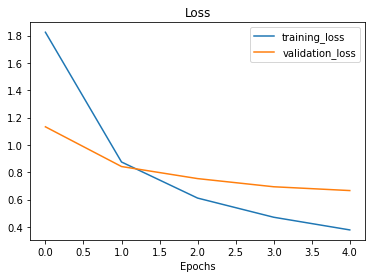

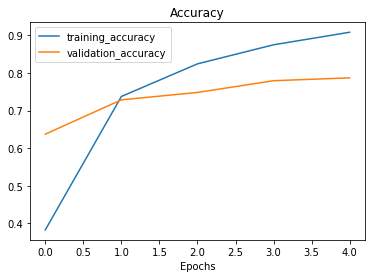

In [ ]:
plot_loss_curves(resNet_history)

In [ ]:
# Resnet summary 
resNet_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
feature_extractor_layer (Ker (None, 2048)              23564800  
_________________________________________________________________
output_layer (Dense)         (None, 10)                20490     
Total params: 23,585,290
Trainable params: 20,490
Non-trainable params: 23,564,800
_________________________________________________________________


Chúng ta có thể thấy được sức mạnh của TensorFlow Hub và Transfer Learning qua tóm lược mô hình trên. Lớp trích xuất tính năng có 23.564.800 tham số là các mẫu được thiết lập sẵn mà mô hình đã học được trên tập dữ liệu ImageNet. Vì chúng ta đặt `trainable = False`, các mẫu này vẫn đóng băng (không thể đào tạo) trong quá trình đào tạo.

Điều này có nghĩa là trong quá trình đào tạo, mô hình sẽ cập nhật 20.490 tham số trong lớp đầu ra cho phù hợp với tập dữ liệu của chúng ta.

EfficientNet Model

In [ ]:

# Create model
efficientNet_model = create_model(model_url=efficientNet_url, # use EfficientNetB0 TensorFlow Hub URL
                                  num_classes=train_ds_10_percent.num_classes)

# Compile EfficientNet model
efficientNet_model.compile(loss='categorical_crossentropy',
                           optimizer='Adam',
                           metrics=['accuracy'])

# Fit EfficientNet model 
efficientNet_history = efficientNet_model.fit(train_ds_10_percent, # only use 10% of training data
                                              epochs=5, # train for 5 epochs
                                              steps_per_epoch=len(train_ds_10_percent),
                                              validation_data=test_ds_10_percent,
                                              validation_steps=len(test_ds_10_percent),
                                              callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", 
                                                                                     # Track logs under different experiment name
                                                                                     experiment_name="efficientnetB0")])

Saving TensorBoard log file to: tensorflow_hub/efficientnetB0/20210609-041250
Epoch 1/5
24/24 [==============================] - 74s 2s/step - loss: 1.5433 - accuracy: 0.6080 - val_loss: 0.9412 - val_accuracy: 0.8028
Epoch 2/5
24/24 [==============================] - 37s 2s/step - loss: 0.7710 - accuracy: 0.8227 - val_loss: 0.6603 - val_accuracy: 0.8384
Epoch 3/5
24/24 [==============================] - 37s 2s/step - loss: 0.5744 - accuracy: 0.8560 - val_loss: 0.5697 - val_accuracy: 0.8488
Epoch 4/5
24/24 [==============================] - 37s 2s/step - loss: 0.4713 - accuracy: 0.8907 - val_loss: 0.5220 - val_accuracy: 0.8536
Epoch 5/5
24/24 [==============================] - 37s 2s/step - loss: 0.4056 - accuracy: 0.9093 - val_loss: 0.4966 - val_accuracy: 0.8572


Mô hình EfficientNetB7 đã đạt được độ chính xác trên 90% với bộ huấn luyện và trên 85% với bộ thử nghiệm chỉ với 10% dữ liệu huấn luyện

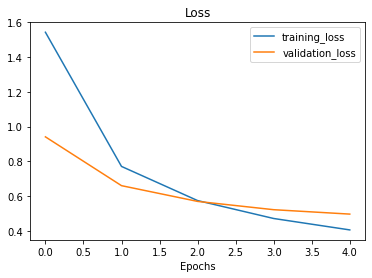

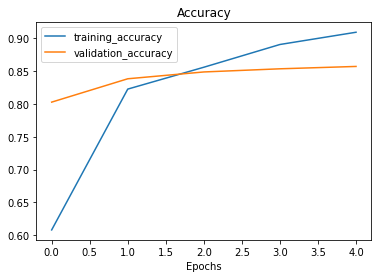

In [ ]:
plot_loss_curves(efficientNet_history)

Từ đồ thì cho thấy chúng ta có thể đạt kết quả tốt hơn nếu đào tạo lâu hơn

In [ ]:
efficientNet_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
feature_extractor_layer (Ker (None, 2560)              64097680  
_________________________________________________________________
output_layer (Dense)         (None, 10)                25610     
Total params: 64,123,290
Trainable params: 25,610
Non-trainable params: 64,097,680
_________________________________________________________________


# **Comparing models using TensorBoard**

Với hai mô hình chúng ta có thể so sánh trực tiếp hiệu quả của chúng thông qua các thông số và biểu đồ đường mất mát cũng như độ chính xác. Nhưng điều gì sẽ xảy ra nếu có nhiều hơn hai mô hình?

Đó là lý do xuất hiện một công cụ theo dõi thử nghiệm như TensorBoard (được cài đặt sẵn trong Google Colab).

Kể từ khi chúng ta thiết lập lệnh gọi lại TensorBoard, tất cả nhật ký đào tạo của mô hình của chúng tôi đã được lưu tự động. Để hình dung chúng, chúng ta có thể tải kết quả lên [TensorBoard.dev.](https://tensorboard.dev/). Tải kết quả của bạn lên TensorBoard.dev cho phép theo dõi và chia sẻ nhiều thử nghiệm mô hình hóa khác nhau. Vì vậy, nếu cần cho ai đó xem kết quả của mình,chúng ta có thể gửi cho họ một liên kết đến TensorBoard.dev cũng như sổ ghi chép Colab đi kèm.

> 🔑 Lưu ý: Các thử nghiệm này là công khai, không tải lên dữ liệu nhạy cảm. Có thể xóa các thử nghiệm nếu cần.

Để tải một loạt nhật ký TensorFlow lên TensorBoard, chúng ta có thể sử dụng lệnh sau:



```
# Upload TensorBoard dev records
!tensorboard dev upload --logdir ./tensorflow_hub/ \ upload directory
  --name "EfficientNetB0 vs. ResNet50V2" \ 
  --description "Comparing two different TF Hub feature extraction models architectures using 10% of training images" \ 
  --one_shot
```

Trong đó:
- `--logdir:` là thư mục đích cần tải lên
- `--name:` là tên của thử nghiệm
- `--description:`là một mô tả ngắn gọn về thử nghiệm
- `--one_shot`: hoát khỏi trình tải lên TensorBoard sau khi quá trình tải lên hoàn tất.




In [ ]:
# Upload TensorBoard dev records
!tensorboard dev upload --logdir ./tensorflow_hub/ \
  --name "EfficientNetB0 vs. ResNet50V2" \
  --description "Comparing two different TF Hub feature extraction models architectures using 10% of training images" \
  --one_shot

2021-06-09 04:21:28.175526: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./tensorflow_hub/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2

Mỗi khi tải nội dung nào đó lên TensorBoad.dev, chúng ta sẽ nhận được một ID thử nghiệm mới. ID thử nghiệm sẽ trông giống như sau: https://tensorboard.dev/experiment/kbfziaJnQ5GlPsNMwy4OOw/(đây là thử nghiệm thực tế từ sổ tay này).

Nếu tải lên lại cùng một thư mục,sẽ nhận được một ID thử nghiệm mới cùng với nó.Điều này có nghĩa là để theo dõi các thử nghiệm của mình, chúng ta có thể xem xét cách  đặt tên cho các tải lên của mình. Bằng cách đó, khi tìm chúng trên TensorBoard.dev,chúng ta có thể cho biết điều gì đã xảy ra trong mỗi thử nghiệm (ví dụ: "performancenet0_10_percent_data").Để xem tất cả các thử nghiệm bạn đã tải lên, bạn có thể sử dụng lệnh: `tensorboard dev list`

In [ ]:
# Check out experiments
!tensorboard dev list

2021-06-09 04:23:55.837002: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Data for the "text" plugin is now uploaded to TensorBoard.dev! Note that uploaded data is public. If you do not want to upload data for this plugin, use the "--plugins" command line argument.
https://tensorboard.dev/experiment/kbfziaJnQ5GlPsNMwy4OOw/
	Name                 EfficientNetB0 vs. ResNet50V2
	Description          Comparing two different TF Hub feature extraction models architectures using 10% of training images
	Id                   kbfziaJnQ5GlPsNMwy4OOw
	Created              2021-06-09 04:21:54 (2 minutes ago)
	Updated              2021-06-09 04:21:57 (2 minutes ago)
	Runs                 4
	Tags                 5
	Scalars              60
	Tensor bytes         0
	Binary object bytes  1780039
Total: 1 experiment(s)


Hãy nhớ rằng, tất cả các tải lên TensorBoard.dev đều ở chế độ công khai, vì vậy, để xóa thử nghiệm,chúng ta có thể sử dụng lệnh: `tensorboard dev delete --experiment_id [INSERT_EXPERIMENT_ID]`


In [ ]:
!tensorboard dev delete --experiment_id [kbfziaJnQ5GlPsNMwy4OOw]

2021-06-09 04:24:48.954260: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Data for the "text" plugin is now uploaded to TensorBoard.dev! Note that uploaded data is public. If you do not want to upload data for this plugin, use the "--plugins" command line argument.
Deleted experiment [kbfziaJnQ5GlPsNMwy4OOw].


In [ ]:
# Check out experiments
!tensorboard dev list

2021-06-09 04:25:03.705783: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Data for the "text" plugin is now uploaded to TensorBoard.dev! Note that uploaded data is public. If you do not want to upload data for this plugin, use the "--plugins" command line argument.
No experiments. Use `tensorboard dev upload` to get started.
